# Домашнее задание 4 - предобработка признаков, pandas

**Выполнила**: Полиенко Анастасия Николаевна, НПМбд-01-19 (вторая подгруппа)

Дата выдачи: 28.09.2022

Срок сдачи: 09.10.2022 23:59MSK

<img src = "https://national-travel.ru/images/photos/medium/9135f3ad6e2d9d6b88a2ff943dffcae9.jpg">

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    if 0 not in arr:
        return None
    if arr[-1] == 0:
        arr = arr[:-1]
    after_zeros = np.array(np.where(arr < 1)) + 1
    return np.max(arr[after_zeros])

max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    d = np.absolute(X - v)
    ind_col = np.argmin(d)
    ind_raw = np.argmin(d[:, ind_col])
    return X[ind_raw][ind_col]

X = np.arange(10).reshape(2, 5)
v = 3.6
nearest_value(X, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(A):
    if 0 in np.std(A, axis = 0):
        return "Error: division by 0"
    A_mean = A - np.mean(A, axis = 0)
    A_std = A_mean / np.std(A, axis = 0)
    return A_std

A = np.random.randint(0,20,(3,5))
print(A)
scale(A)

[[ 9 16  1  1  2]
 [ 4  0  1 16  0]
 [ 9  7  2 14 18]]


array([[ 0.70710678,  1.2724665 , -0.70710678, -1.40351318, -0.57932412],
       [-1.41421356, -1.17066918, -0.70710678,  0.852133  , -0.82760589],
       [ 0.70710678, -0.10179732,  1.41421356,  0.55138018,  1.40693001]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    if X.shape[0] != X.shape[1]:
        print('Определитель не определён')
    else:
        print('Определитель:', np.linalg.det(X))
    print("След:", np.trace(X))
    print('Наибольший элемент:', np.max(X))
    print("Наименьший элемент:", np.min(X))
    print("Норма Фробениуса:", np.linalg.norm(X))
    if X.shape[0] != X.shape[1]:
        print('Собственные числа не определены')
    else:
        print("Собственные числа:", np.linalg.eig(X)[0])
    if (X.shape[0] != X.shape[1]) or (np.linalg.det(X) == 0):
        print('Обратная матрица не определена')
    else:
        print("Обратная матрица:", np.linalg.inv(X))

A = np.random.randn(5, 5) + 10
print(A)
get_stats(A)
print()
B = np.random.randn(2, 5) + 10
print(B)
get_stats(B)

[[10.96520296  9.40143653  8.88181756 10.59373371  7.14220669]
 [ 9.16631991  9.94879985  9.03022465  9.61333535 11.26290537]
 [ 9.55319067  9.93687457  9.1953211  11.5979231   9.03838018]
 [10.59681033 11.55722865 10.5960255  10.08791879 10.66919687]
 [ 7.4195517   9.84730334  9.06608045  9.14312411 10.32291188]]
Определитель: -25.95834156626859
След: 50.52015457681159
Наибольший элемент: 11.597923095664877
Наименьший элемент: 7.142206687580236
Норма Фробениуса: 49.22837234043118
Собственные числа: [48.97542248+0.j          3.48598078+0.j         -0.23764645+0.21735194j
 -0.23764645-0.21735194j -1.46595578+0.j        ]
Обратная матрица: [[ 0.2537991   0.356593   -0.26178935 -0.0211045  -0.31363622]
 [-4.4790907  -0.65014345  4.45484407  4.50744564 -4.75082072]
 [ 4.51656987 -0.10526735 -4.64701201 -4.10516487  5.3015675 ]
 [-0.15733384 -0.02862     0.49701785 -0.19503636 -0.09351041]
 [ 0.26299036  0.48168948 -0.4204194  -0.50650456  0.28096266]]

[[10.54473092  9.82917157 10.64716617

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
exp = list()
for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    exp.append(np.max(A.dot(B)))
print("Среднее значение:", np.mean(exp))
print("95-ая квантиль:", np.quantile(exp, 0.95))

Среднее значение: 8.29561350834413
95-ая квантиль: 11.438419115713797


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm) - фактическое время отправления  
**CRSDepTime** scheduled departure time (local, hhmm) - запланированное время отправления  
**ArrTime** actual arrival time (local, hhmm) - фактическое время прибытия  
**CRSArrTime** scheduled arrival time (local, hhmm) - запланированное время прибытия  
**UniqueCarrier** unique carrier code - уникальный код перевозчика  
**FlightNum** flight number - номер рейса  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier - бортовой номер самолета: регистрационный номер самолета, уникальный идентификатор самолета  
**ActualElapsedTime** in minutes    
**CRSElapsedTime** in minutes  
**AirTime** in minutes - время полёта  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS). - задержка прибытия, в минутах: Рейс считается «выполненным вовремя», если он был отправлен менее чем на 15 минут позже запланированного времени, указанного в компьютеризированных системах бронирования (КСБ) перевозчиков.   
**DepDelay** departure delay, in minutes - задержка отправления  
**Origin** origin IATA airport code - код аэропорта отправления IATA  
**Dest** destination IATA airport code - код аэропорта назначения IATA  
**Distance** in miles - расстояние  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** was the flight cancelled - был ли рейс отменён  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) - причина отмены  
**Diverted** 1 = yes, 0 = no - перенаправлен   
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays. - задержка по причинам перевозчика  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival. - задержка по причинам погоды  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. - задержка по причинам NAS   
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas. - задержка по причинам безопасности  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation. - задержка по причинам опоздания

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [9]:
df.groupby('CancellationCode').size()

CancellationCode
A    563
B    549
C    299
dtype: int64

**Ответ:** Самой частой причиной отмены была отмена со стороны авиакомпании (A - carrier)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
print("Среднее расстояние, пройденное самолётом:", df["Distance"].mean())
df.groupby("TailNum")["Distance"].mean()

Среднее расстояние, пройденное самолётом: 724.5082571428571


TailNum
80009E     531.947368
80019E     453.095238
80059E     394.235294
80129E     357.272727
80139E     450.826087
             ...     
N997DL     701.230769
N998AT     684.210526
N998DL     728.500000
N999DN     729.900000
NHZOAL    2404.000000
Name: Distance, Length: 5120, dtype: float64

In [11]:
print("Минимальное расстояние, пройденное самолётом:", df["Distance"].min())
df.groupby("TailNum")["Distance"].min()

Минимальное расстояние, пройденное самолётом: 31


TailNum
80009E     223
80019E     155
80059E      98
80129E     120
80139E     113
          ... 
N997DL     134
N998AT     292
N998DL     356
N999DN     223
NHZOAL    2404
Name: Distance, Length: 5120, dtype: int64

In [12]:
print("Максимальное расстояние, пройденное самолётом:", df["Distance"].max())
df.groupby("TailNum")["Distance"].max()

Максимальное расстояние, пройденное самолётом: 4962


TailNum
80009E    1139
80019E     777
80059E     874
80129E     596
80139E    1092
          ... 
N997DL    1197
N998AT    1144
N998DL    1282
N999DN    1121
NHZOAL    2404
Name: Distance, Length: 5120, dtype: int64

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [13]:
df[df["Distance"] == 31][["FlightNum", "Distance", "DayofMonth", "Month", "Year"]]

,FlightNum,Distance,DayofMonth,Month,Year
1116,65,31,30,12,2008
6958,65,31,26,12,2008
17349,64,31,18,8,2008
27534,64,31,11,3,2008
46082,65,31,9,8,2008
48112,64,31,28,2,2008


**Ответ**: минимальное расстояния было на рейсах 65 (30.12.2008, 26.12.2008, 9.8.2008) и 64 (18.8.2008, 11.3.2008, 28.2.2008)

In [14]:
temp_df = df.drop([1116, 6958, 17349, 27534, 46082, 48112], axis = 0)
temp_df[(temp_df["FlightNum"] == 65) | (temp_df["FlightNum"] == 64)][["FlightNum", "Distance", "DayofMonth", "Month", "Year"]]

,FlightNum,Distance,DayofMonth,Month,Year
501,64,533,20,3,2008
1389,64,680,13,3,2008
1517,65,680,10,7,2008
2619,64,2381,23,5,2008
3869,64,82,1,7,2008
...,...,...,...,...,...
66529,65,82,21,12,2008
67172,64,533,22,3,2008
68264,65,386,7,9,2008
68338,65,2454,3,8,2008


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [15]:
df.groupby("Origin").size().reset_index(name = 'size').sort_values(by = "size", ascending = False).head(1)

,Origin,size
18,ATL,4134


**Ответ**: Из аэропорта ATL было совершено больше всего вылетов.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [16]:
df.groupby("Origin")["AirTime"].mean()

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

In [17]:
df.groupby("Origin")["AirTime"].mean().reset_index(name = 'meantime').sort_values(by = "meantime", ascending = False).head(1)

,Origin,meantime
262,SJU,205.2


**Ответ:** Наибольшее среднее время полёта по вылетевшим рейсам у аэропорта SJU.

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [18]:
temp_df = df.groupby("Origin").size().reset_index(name = 'size')
origin_names = list(temp_df[temp_df["size"] >= 1000]["Origin"])
shortened_df = df[(df["Origin"].isin(origin_names))]
overall_num = shortened_df.groupby("Origin").size().reset_index(name = 'size')
delay_num = shortened_df[shortened_df["DepDelay"] > 0].groupby("Origin").size().reset_index(name = 'size')
delay_num["ratio"] = delay_num["size"] / overall_num["size"]
delay_num.sort_values(by = "ratio", ascending = False).head(1)

,Origin,size,ratio
7,EWR,710,0.511159


**Ответ:** Наибольшая доля задержанных рейсов у аэропорта EWR

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [19]:
print("Eсть ли в данных пропуски?", end = ' ')
if df.isna().any().any(): 
    print("Да")
    print("Всего пропусков:", df.isnull().sum().sum())
else: 
    print("Нет")

Eсть ли в данных пропуски? Да
Всего пропусков: 355215


In [20]:
temp_df = df.isnull().sum(axis = 1).reset_index(name = "sum_nan")
print("Сколько объектов с пропусками:", temp_df[temp_df["sum_nan"] != 0].shape[0])

Сколько объектов с пропусками: 70000


In [21]:
temp_df = df.isnull().sum(axis = 0).reset_index(name = "sum_nan")
print("Сколько признаков с пропусками:", temp_df[temp_df["sum_nan"] != 0].shape[0])

Сколько признаков с пропусками: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [22]:
if df["DepDelay"].isnull().any():
    print("Есть пропуски в целевой переменной")
else:
    print("Нет пропусков в целевой переменной")
    
temp = df[df["DepDelay"].isnull() == True]
pd.unique(temp["Cancelled"])

Есть пропуски в целевой переменной


array([1], dtype=int64)

У таких объектов также пропуски в других признаках, таких как DepTime, ArrTime, TaxiIn, TaxiOut, а также все из них отменены (Cancelled = 1)

In [23]:
index_list = list(df[(df["DepDelay"].isnull() == True) | (df["DepDelay"] == 0)].index)
df_linreg = df.drop(index_list, axis = 0)
df_linreg.drop(["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Cancelled", 
                "CancellationCode", "Year", "TailNum"], axis = 1, inplace = True)
df_depdelay = df_linreg["DepDelay"]
df_linreg.drop("DepDelay", axis = 1, inplace = True)
df_linreg

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,6,18,3,2111.0,2055,2308.0,2300,WN,242,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0
1,6,4,3,1426.0,1410,1730.0,1728,XE,2380,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0
2,8,3,7,1143.0,1145,1501.0,1520,WN,1769,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0
3,1,23,3,1141.0,1144,1323.0,1335,OO,3802,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0
4,5,4,7,815.0,820,1243.0,1300,WN,399,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,920.0,925,1110.0,1118,OH,5218,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0,0
69995,5,12,1,1829.0,1840,2137.0,2149,DL,794,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0
69996,5,11,7,1149.0,1125,1336.0,1314,OO,6159,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0
69998,2,18,1,1906.0,1900,2200.0,2139,NW,641,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [24]:
def make_hh_mm(X):
    list_hh = list()
    list_mm = list()
    for i in X:
        if np.isnan(i):
            list_hh.append(np.nan)
            list_mm.append(np.nan)
        else:
            temp = str(int(i))
            list_hh.append(float(('0'*(4-len(temp)) + temp)[:-2]))
            list_mm.append(float(('0'*(4-len(temp)) + temp)[-2:]))
    return list_hh, list_mm

df_linreg["DepTime_Hour"], df_linreg["DepTime_Minute"] = make_hh_mm(df_linreg["DepTime"])
df_linreg.drop("DepTime", axis = 1, inplace = True)
df_linreg["CRSDepTime_Hour"], df_linreg["CRSDepTime_Minute"] = make_hh_mm(df_linreg["CRSDepTime"])
df_linreg.drop("CRSDepTime", axis = 1, inplace = True)
df_linreg["ArrTime_Hour"], df_linreg["ArrTime_Minute"] = make_hh_mm(df_linreg["ArrTime"])
df_linreg.drop("ArrTime", axis = 1, inplace = True)
df_linreg["CRSArrTime_Hour"], df_linreg["CRSArrTime_Minute"] = make_hh_mm(df_linreg["CRSArrTime"])
df_linreg.drop("CRSArrTime", axis = 1, inplace = True)
df_linreg

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,8.0,MDW,...,8.0,0,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,6,4,3,XE,2380,124.0,138.0,108.0,2.0,IAH,...,12.0,0,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,8,3,7,WN,1769,138.0,155.0,125.0,-19.0,MDW,...,9.0,0,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,1,23,3,OO,3802,102.0,111.0,79.0,-12.0,SLC,...,19.0,0,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,5,4,7,WN,399,148.0,160.0,136.0,-17.0,LAS,...,8.0,0,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-8.0,CVG,...,13.0,0,9.0,20.0,9.0,25.0,11.0,10.0,11.0,18.0
69995,5,12,1,DL,794,128.0,129.0,86.0,-12.0,ORD,...,20.0,0,18.0,29.0,18.0,40.0,21.0,37.0,21.0,49.0
69996,5,11,7,OO,6159,47.0,49.0,30.0,22.0,ORD,...,13.0,0,11.0,49.0,11.0,25.0,13.0,36.0,13.0,14.0
69998,2,18,1,NW,641,234.0,219.0,192.0,21.0,RSW,...,22.0,0,19.0,6.0,19.0,0.0,22.0,0.0,21.0,39.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

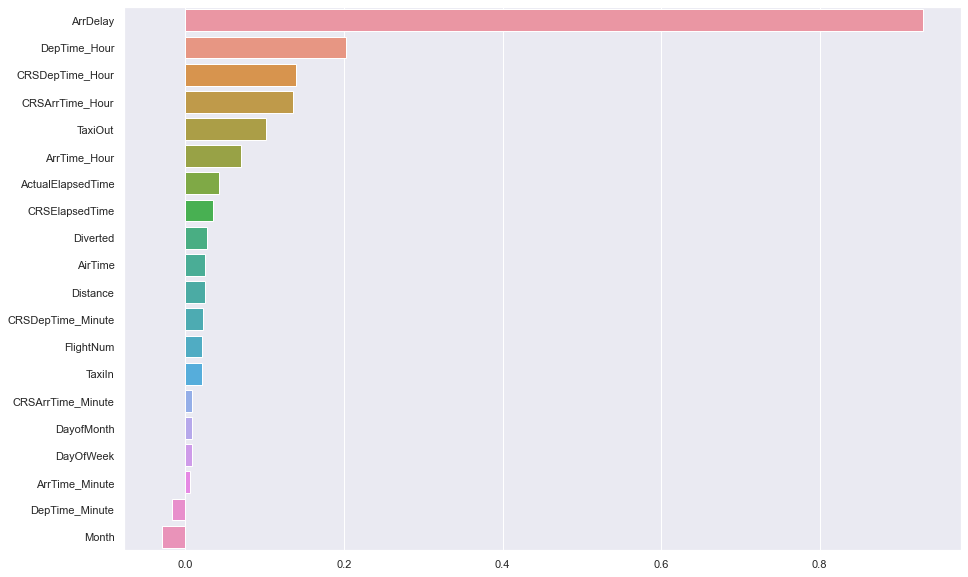

In [25]:
import seaborn as sns
sns.set(style="darkgrid")

cor_df = df_linreg.copy().select_dtypes([np.number])
features = cor_df.columns
cor_df

for i in features:
    cor_df[i].fillna(cor_df[i].mean(), inplace = True)
    
cor_df.isna().any()

correlations = {
    feature: np.corrcoef(cor_df[feature], df_depdelay)[0][1]
    for feature in features
}

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

Сильно коррелирует параметр ArrDelay

In [26]:
df_linreg.drop("ArrDelay", axis = 1, inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

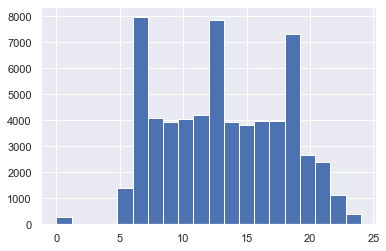

In [27]:
df_linreg['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

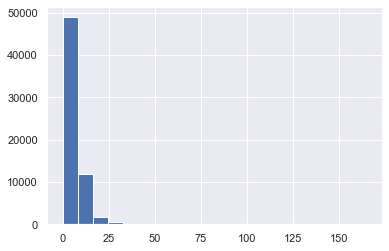

In [28]:
df_linreg['TaxiIn'].hist(bins=20)

<AxesSubplot:>

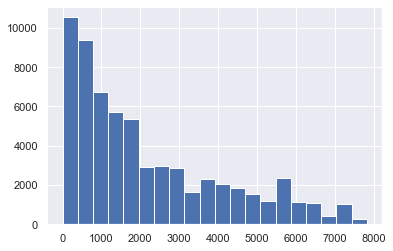

In [29]:
df_linreg['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ:** Маштабированние нужно, чтобы избежать больших значений выходных данных. После маштабирования признаки будут регуляризироваться в равной степени.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
def transform_data(data):
    numeric_data = list(data.select_dtypes(np.number).columns)
    data[numeric_data] = data[numeric_data].fillna(0)
    scaler = StandardScaler()
    data[numeric_data] = scaler.fit_transform(data[numeric_data])
    categorical_data = list(data.select_dtypes(object).columns)
    data[categorical_data] = data[categorical_data].fillna('nan')
    temp = pd.get_dummies(data[categorical_data])
    result_data = pd.concat([data, temp], axis = 1).drop(categorical_data, axis = 1)
    return result_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [33]:
data = transform_data(df_linreg)
print(data.columns.size, "признаков")

633 признаков


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df_depdelay, test_size = 0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, 
                                                                            train_size = 1000, random_state = 42)
reg = LinearRegression().fit(X_train_train, y_train_train)

In [36]:
y_train_train_pred = reg.predict(X_train_train)
print("MSE подвыборки:", mean_squared_error(y_train_train, y_train_train_pred))
print("R^2 подвыборки:", reg.score(X_train_train, y_train_train))

MSE подвыборки: 444.650072265625
R^2 подвыборки: 0.6178410433712322


In [37]:
y_test_pred = reg.predict(X_test)
print("MSE контрольной выборки:", mean_squared_error(y_test, y_test_pred))
print("R^2 контрольной выборки:", reg.score(X_test, y_test))

MSE контрольной выборки: 1.3291305344700908e+25
R^2 контрольной выборки: -9.936169342194508e+21


**Ответ:** Получили большие числа $MSE$ и $R^2$ для контрольной выборки, что говорит о том, что модель очень плохая

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [38]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict

__18. (1 балл)__ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [39]:
lasso_model = Lasso()
lasso_model.fit(X_train_train, y_train_train)
ridge_model = Ridge()
ridge_model.fit(X_train_train, y_train_train)
print("Нулевые коэффициенты для модели Lasso:", np.sum(np.absolute(lasso_model.coef_) < 10 ** (-10)))
print("Нулевые коэффициенты для модели Ridge:", np.sum(np.absolute(ridge_model.coef_) < 10 ** (-10)))

Нулевые коэффициенты для модели Lasso: 623
Нулевые коэффициенты для модели Ridge: 286


In [40]:
alphas = 10 ** np.linspace(-3, 3, 20)
lasso_zeros_num = list()
ridge_zeros_num = list()
for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=100000)
    lasso_model.fit(X_train_train, y_train_train)
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train_train, y_train_train)
    lasso_zeros_num.append(np.sum(np.absolute(lasso_model.coef_) < 10 ** (-10)))
    ridge_zeros_num.append(np.sum(np.absolute(ridge_model.coef_) < 10 ** (-10)))

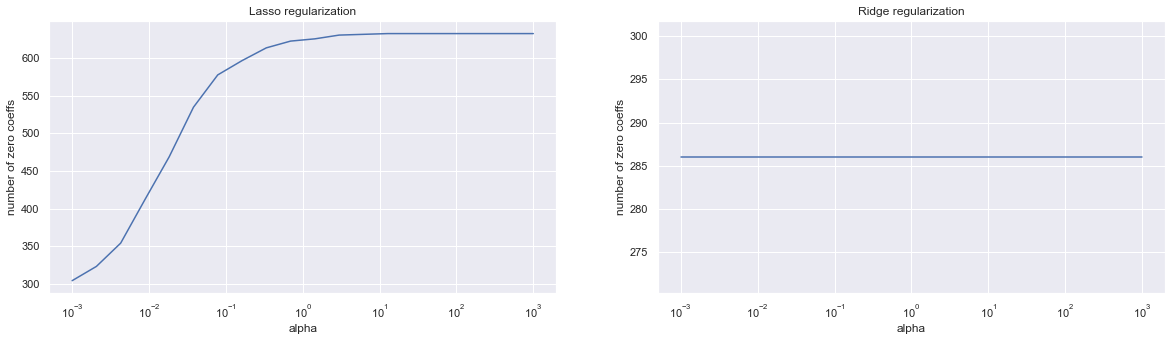

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(alphas, lasso_zeros_num)
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of zero coeffs")
ax[0].set_title("Lasso regularization")
ax[0].set_xscale('log')
ax[1].plot(alphas, ridge_zeros_num)
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("number of zero coeffs")
ax[1].set_title("Ridge regularization")
ax[1].set_xscale('log')

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [42]:
def show_metrics(X_train, y_train, X_test, y_test, alpha = 1.0):
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    print("RMSE:", mean_squared_error(y_test, y_test_pred, squared = False))
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("R^2:", ridge_model.score(X_test, y_test))

In [43]:
show_metrics(X_train_train, y_train_train, X_test, y_test)

RMSE: 3645724255165.3447
MAE: 1059295424979.4875
R^2: -0.25015250861838734


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [44]:
from sklearn.model_selection import GridSearchCV

def search_best_alpha(scoring, X_train, y_train):
    alphas = 10 ** np.linspace(-3, 3, 50)
    searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring = scoring, cv = 5)
    searcher.fit(X_train, y_train)
    best_alpha = searcher.best_params_["alpha"]
    print("Best alpha for", scoring, "is", best_alpha)
    plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("CV score")
    plt.title(scoring)
    return best_alpha

Best alpha for neg_root_mean_squared_error is 19.306977288832496
RMSE: 3645724255165.3447
MAE: 1059295424979.4875
R^2: 0.06595264385232247


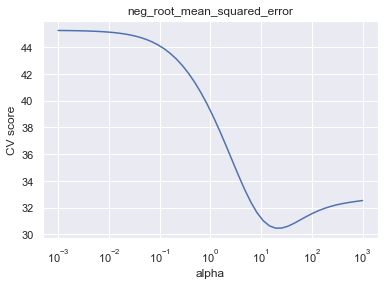

In [45]:
best_alpha = search_best_alpha('neg_root_mean_squared_error', X_train_train, y_train_train)
show_metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

Best alpha for neg_mean_absolute_error is 1.5264179671752334
RMSE: 3645724255165.3447
MAE: 1059295424979.4875
R^2: -0.20761883263186443


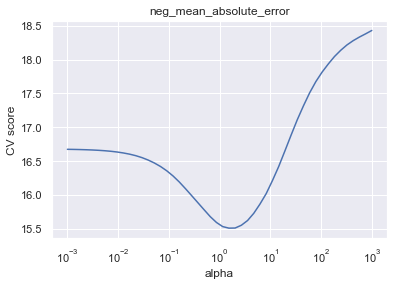

In [46]:
best_alpha = search_best_alpha('neg_mean_absolute_error', X_train_train, y_train_train)
show_metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

Best alpha for r2 is 25.595479226995334
RMSE: 3645724255165.3447
MAE: 1059295424979.4875
R^2: 0.08008002136332737


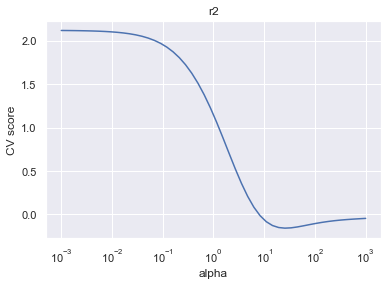

In [47]:
best_alpha = search_best_alpha('r2', X_train_train, y_train_train)
show_metrics(X_train_train, y_train_train, X_test, y_test, best_alpha)

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Text(0.5, 1.0, 'Error histogram')

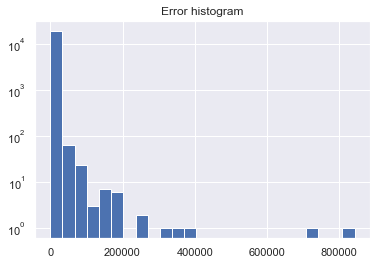

In [48]:
model = Ridge()
y_pred = cross_val_predict(model, X_test, y_test)
error = (y_pred - y_test) ** 2
plt.hist(error, bins = 25)
plt.yscale("log")
plt.title("Error histogram")

**Вывод:** обработка данных это сложно 